In [1]:
# act with actor critic on moon lander 

In [1]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import pdb

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal

import sys
import time
from IPython.display import display, clear_output

from tqdm.auto import tqdm

from utils import ReturnTracker
from ac import ActorCritic
from sac import SoftActorCritic
from ac_op import ActorCriticOffPolicy
from asac import AttentionSoftActorCritic
from envs import OptimizationEnv

In [2]:
torch.cuda.is_available()

False

In [12]:
env = OptimizationEnv(continuous=True)

In [13]:
observation, info = env.reset()

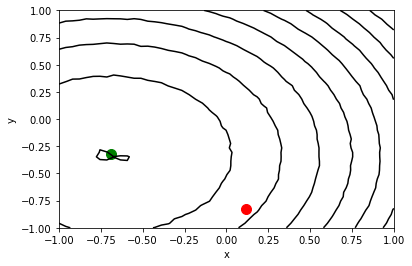

In [14]:
env.render()

In [15]:
# env = gym.make("LunarLander-v2", continuous=True, render_mode='rgb_array').env  # "LunarLander-v2", continuous=True; "Pendulum-v1", 

In [16]:
# agent = ActorCritic(env, lr_policy=2e-2, lr_critic=2e-2, gamma=.99,
#                     device='cuda' if torch.cuda.is_available() else 'cpu')

# agent = ActorCriticOffPolicy(env, lr=1e-2, gamma=.99,
#                     device='cuda' if torch.cuda.is_available() else 'cpu')

agent = SoftActorCritic(env, lr=1e-2, gamma=.99, batch_size=64, gradient_steps=8,
                    device='cuda' if torch.cuda.is_available() else 'cpu')

# agent = AttentionSoftActorCritic(env, lr=1e-2, gamma=.99, batch_size=64, gradient_steps=8,
#                     device='cuda' if torch.cuda.is_available() else 'cpu')



In [17]:
tracker = ReturnTracker()



In [18]:
# agent.learn(episodes=100,
#             max_steps=100, 
#             tracker=tracker)

agent.learn(episodes=10,
            episode_steps=10, 
            two_pbars=False,
            tracker=tracker)



  0%|          | 0/10 [00:00<?, ?it/s]

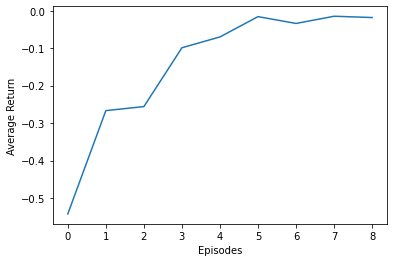

In [19]:
tracker.plot(smooth=1)


steps: 11, returns: 0.018721577582277823
terminated False 0.0036103451571504906 0.009163762783672964


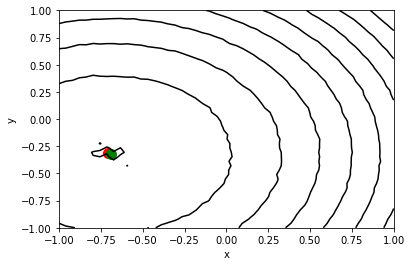

KeyboardInterrupt: 

In [20]:
# test
while True:
    
    # env = gym.make("LunarLander-v2", 
    #                continuous=True, 
    #                gravity = -3.0,
    #                enable_wind = False,
    #                wind_power = 15.0,
    #                turbulence_power = 1.5,
    #                render_mode='rgb_array').env
    
    terminated, truncated = False, False
    
    state, info = env.reset(new_params=False)
    
    env.render()
    # plt.imshow(env.render())
    # plt.show()
    
    steps = 0
    returns = 0
    
    while not terminated and not truncated:

        time.sleep(.05)
        clear_output(wait=True)

        action, _ = agent.predict(state)
        new_state, reward, terminated, truncated, info = env.step(action.flatten())

        steps += 1
        state = torch.tensor(new_state)
        returns += reward
        
        print('steps: {}, returns: {}'.format(steps, returns))
        print('terminated', terminated, reward, env.params['noise'])

        env.render()
        # plt.imshow(env.render())
        # plt.show()
        sys.stdout.flush()
        
        if steps > 10:
            break
    
    time.sleep(1.)